In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

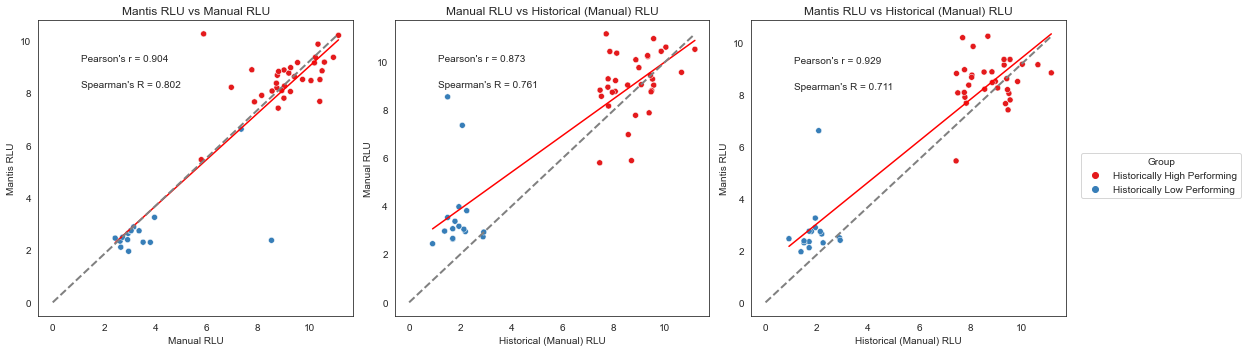

In [36]:
def plot_scatter(df, pairs):
    # Set the style of the plot to white
    sns.set_style('white')

    # Create a color column, 'Group', based on index to differentiate first 32 and next 16 datapoints
    df['Group'] = np.where(df.index < 32, 'Historically High Performing', 'Historically Low Performing')
    
    fig, axes = plt.subplots(1, len(pairs), figsize=(15, 5))

    for i, (x, y) in enumerate(pairs):
        # Swap x and y for the 2nd and 3rd plots
        if i > 0:
            x, y = y, x

        # Calculate Spearman and Pearson correlation
        pearson_corr, _ = pearsonr(df[x], df[y])
        spearman_corr, _ = spearmanr(df[x], df[y])

        # Scatter plot with different colors for first 32 and next 16 datapoints
        scatter = sns.scatterplot(x=x, y=y, hue='Group', data=df, ax=axes[i], palette='Set1')
        
        # Set the title with y-axis label coming first
        axes[i].set_title(f'{y} RLU vs {x} RLU')

        # Add text for Spearman and Pearson correlation
        axes[i].text(df[x].max()*0.1, df[y].max()*0.9, f"Pearson's r = {round(pearson_corr, 3)}")
        axes[i].text(df[x].max()*0.1, df[y].max()*0.8, f"Spearman's R = {round(spearman_corr, 3)}")
        
        # Plot correlation line
        sns.lineplot(x=np.unique(df[x]), y=np.poly1d(np.polyfit(df[x], df[y], 1))(np.unique(df[x])), color='red', ax=axes[i])
        
        # Plot perfect correlation line
        axes[i].plot([0, df[x].max()], [0, df[y].max()], color='grey', linestyle='--', lw=2)
        
        # Set x and y labels with 'RLU'
        axes[i].set_xlabel(f'{x} RLU')
        axes[i].set_ylabel(f'{y} RLU')

        # Handle legends
        scatter.legend_.remove()

    # Add a single legend outside of the subplots
    handles, labels = scatter.get_legend_handles_labels()
    fig.legend(handles, labels, title='Group', loc='center left', bbox_to_anchor=(1, 0.5))

    fig.tight_layout()
    
    plt.savefig('SpearmanPlot.png', dpi=300, bbox_inches='tight')
    plt.show()

# Load the Excel file
df = pd.read_excel('PlotResults.xlsx')

# Specify pairs to plot
pairs = [('Manual', 'Mantis'), ('Manual', 'Historical (Manual)'), ('Mantis', 'Historical (Manual)')]

# Generate scatter plots
plot_scatter(df, pairs)

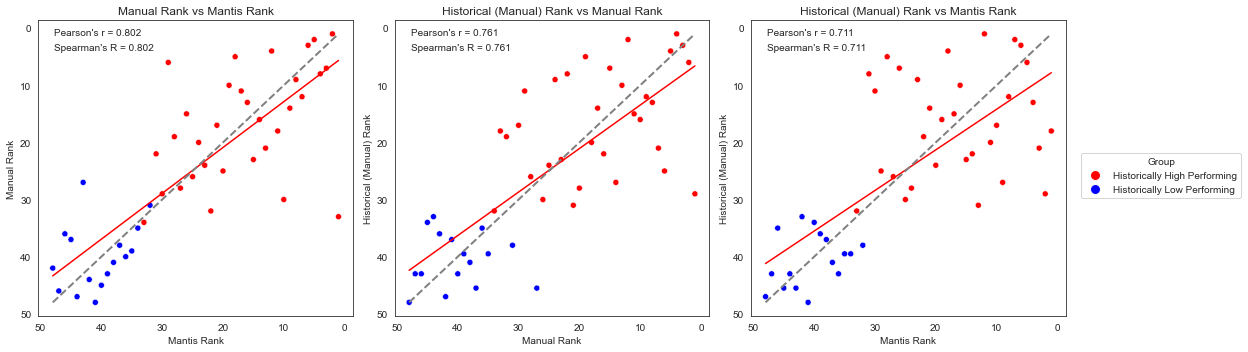

In [64]:
def plot_scatter_ranks(df, pairs):
    sns.set_style('white')

    # Create a color column, 'Group', based on index
    df['Group'] = np.where(df.index < 32, 'Historically High Performing', 'Historically Low Performing')

    df_rank = df.rank(ascending=False)

    fig, axes = plt.subplots(1, len(pairs), figsize=(5*len(pairs), 5))

    for i, (x, y) in enumerate(pairs):
        if i > 0:
            x, y = y, x

        pearson_corr, _ = pearsonr(df_rank[x], df_rank[y])
        spearman_corr, _ = spearmanr(df_rank[x], df_rank[y])

        scatter = sns.scatterplot(x=y, y=x, hue='Group', data=df_rank, ax=axes[i], palette=['blue', 'red'])  # Change the palette colors

        axes[i].set_title(f'{x} Rank vs {y} Rank')
        axes[i].text(0.05, 0.95, f"Pearson's r = {round(pearson_corr, 3)}", transform=axes[i].transAxes)
        axes[i].text(0.05, 0.90, f"Spearman's R = {round(spearman_corr, 3)}", transform=axes[i].transAxes)

        sns.lineplot(x=np.unique(df_rank[y]), y=np.poly1d(np.polyfit(df_rank[y], df_rank[x], 1))(np.unique(df_rank[y])),
                     color='red', ax=axes[i])

        axes[i].plot([df_rank[y].max(), df_rank[y].min()], [df_rank[x].max(), df_rank[x].min()], color='grey',
                     linestyle='--', lw=2)

        axes[i].set_xlabel(f'{y} Rank')
        axes[i].set_ylabel(f'{x} Rank')
        axes[i].invert_xaxis()
        axes[i].invert_yaxis()

        scatter.legend_.remove()

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in ['red', 'blue']]
    labels = ['Historically High Performing', 'Historically Low Performing']

    fig.legend(handles, labels, title='Group', loc='center left', bbox_to_anchor=(1, 0.5))

    fig.tight_layout()

    plt.savefig('SpearmanPlotRanks.png', dpi=300, bbox_inches='tight')
    plt.show()

df = pd.read_excel('PlotResults.xlsx')
pairs = [('Manual', 'Mantis'), ('Manual', 'Historical (Manual)'), ('Mantis', 'Historical (Manual)')]
plot_scatter_ranks(df, pairs)



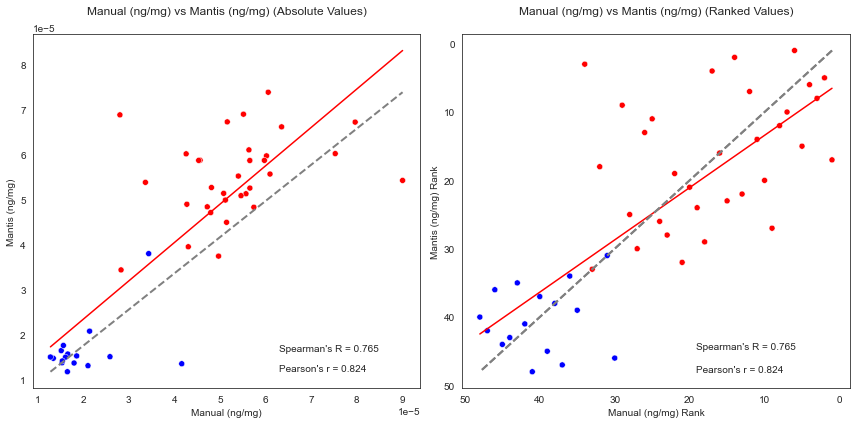

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

def plot_scatter_subplots(df, x_column, y_column):
    # Set the style of the plot to white
    sns.set_style('white')

    # Create a color column, 'Group', based on index
    df['Group'] = np.where(df.index < 32, 'Historically High Performing', 'Historically Low Performing')

    # Calculate Spearman and Pearson correlation
    pearson_corr, _ = pearsonr(df[x_column], df[y_column])
    spearman_corr, _ = spearmanr(df[x_column], df[y_column])

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot with different colors for first 32 and next 16 datapoints
    scatter1 = sns.scatterplot(ax=ax1, x=x_column, y=y_column, hue='Group', data=df, palette=['red', 'blue'])

    # Set the title for the first subplot
    scatter1.set_title(f'{x_column} vs {y_column} (Absolute Values)', pad=20)

    # Add text for Spearman and Pearson correlation to the first subplot
    scatter1.text(df[x_column].max() * 0.7, df[y_column].max() * 0.16, f"Pearson's r = {round(pearson_corr, 3)}")
    scatter1.text(df[x_column].max() * 0.7, df[y_column].max() * 0.22, f"Spearman's R = {round(spearman_corr, 3)}")

    # Plot correlation line for the first subplot
    sns.lineplot(ax=ax1, x=np.unique(df[x_column]), y=np.poly1d(np.polyfit(df[x_column], df[y_column], 1))(np.unique(df[x_column])),
                 color='red')

    # Plot perfect correlation line for the first subplot
    scatter1.plot([df[x_column].min(), df[x_column].max()], [df[y_column].min(), df[y_column].max()], color='grey',
                 linestyle='--', lw=2)

    # Handle legends for the first subplot
    handles1, labels1 = scatter1.get_legend_handles_labels()
    scatter1.legend(handles1, labels1, title='Group', loc='center left', bbox_to_anchor=(1, 0.5))

    # Calculate ranked values
    ranked_df = df.rank(ascending=False)

    # Scatter plot with different colors for first 32 and next 16 datapoints (Ranked values)
    scatter2 = sns.scatterplot(ax=ax2, x=x_column, y=y_column, hue='Group', data=ranked_df, palette=['blue', 'red'])

    # Set the title for the second subplot
    scatter2.set_title(f'{x_column} vs {y_column} (Ranked Values)', pad=20)

    # Plot correlation line for the second subplot
    sns.lineplot(ax=ax2, x=np.unique(ranked_df[x_column]), y=np.poly1d(np.polyfit(ranked_df[x_column], ranked_df[y_column], 1))(np.unique(ranked_df[x_column])),
                 color='red')

    # Plot perfect correlation line for the second subplot
    scatter2.plot([ranked_df[x_column].min(), ranked_df[x_column].max()], [ranked_df[y_column].min(), ranked_df[y_column].max()], color='grey', linestyle='--', lw=2)
        # Plot perfect correlation line for the second subplot
    scatter2.plot([ranked_df[x_column].min(), ranked_df[x_column].max()], [ranked_df[y_column].min(), ranked_df[y_column].max()], color='grey',
                 linestyle='--', lw=2)

    scatter2.legend_.remove()
    scatter1.legend_.remove()

    #invert x and y axis for the second subplot
    ax2.invert_xaxis()
    ax2.invert_yaxis()
    ax2.set_xlabel(f'{x_column} Rank')
    ax2.set_ylabel(f'{y_column} Rank')
    
    # Add text for Spearman and Pearson correlation to the second subplot
    scatter2.text(ranked_df[x_column].max() * 0.4, ranked_df[y_column].max() * 1.0, f"Pearson's r = {round(pearson_corr, 3)}")
    scatter2.text(ranked_df[x_column].max() * 0.4, ranked_df[y_column].max() * 0.93, f"Spearman's R = {round(spearman_corr, 3)}")


    plt.tight_layout()
    plt.savefig('ScatterPlotNormalized.png', dpi=300, bbox_inches='tight')
    plt.show()

# Load the Excel file
df = pd.read_excel('PlotResultsNormalized.xlsx')

# Generate scatter plots with subplots
plot_scatter_subplots(df, 'Manual (ng/mg)', 'Mantis (ng/mg)')



Pearson correlation: 0.9293177569122956
Spearman correlation: 0.8666666666666667


C:\Users\enoch\AppData\Local\Temp\ipykernel_26268\905674270.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(manual_values, manual_values, 'g--', label='perfect trend line', color='gray')


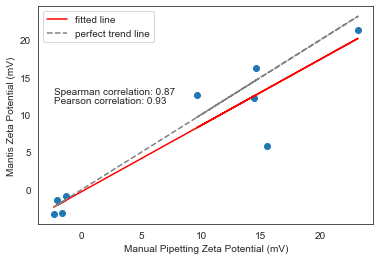

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress

# Read the Excel sheet into a pandas DataFrame
data = pd.read_excel('0614_MantisValidationSet_1.xlsx', sheet_name='Zeta')

# Extract Sample Name and Z-Average columns
extracted_data = data[['Sample Name', 'Zeta Potential']]

# Calculate the average Z-Average for rows with the same sample name
averaged_data = extracted_data.groupby('Sample Name').mean().reset_index()

# Define the datapoints and their corresponding Manual (-M) and Automated (-A) values
datapoints = averaged_data['Sample Name']
manual_values = averaged_data.loc[averaged_data['Sample Name'].str.endswith('- M'), 'Zeta Potential']
automated_values = averaged_data.loc[averaged_data['Sample Name'].str.endswith('- A'), 'Zeta Potential']

# Perform Pearson correlation
pearson_corr, _ = pearsonr(manual_values, automated_values)
print(f'Pearson correlation: {pearson_corr}')

# Perform Spearman correlation
spearman_corr, _ = spearmanr(manual_values, automated_values)
print(f'Spearman correlation: {spearman_corr}')

# Plot the scatter plot
plt.scatter(manual_values, automated_values)

# Calculate the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(manual_values, automated_values)

# Plot the regression line
plt.plot(manual_values, intercept + slope * manual_values, 'r', label='fitted line')

# Plot perfect trend line
plt.plot(manual_values, manual_values, 'g--', label='perfect trend line', color='gray')

# Adding the correlation values on the lower center left of the graph
plt.text(min(manual_values), min(automated_values) + 0.6*(max(automated_values)-min(automated_values)), f'Pearson correlation: {pearson_corr:.2f}')
plt.text(min(manual_values), min(automated_values) + 0.65*(max(automated_values)-min(automated_values)), f'Spearman correlation: {spearman_corr:.2f}')

plt.xlabel('Manual Pipetting Zeta Potential (mV)')
plt.ylabel('Mantis Zeta Potential (mV)')
plt.legend()

plt.savefig('ZetaPlot.png', dpi=300, bbox_inches='tight')
plt.show()


Pearson correlation: 0.5200546186818538
Spearman correlation: 0.5692307692307692


C:\Users\enoch\AppData\Local\Temp\ipykernel_26268\3101886527.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(manual_values, manual_values, 'g--', label='perfect trend line', color='gray')


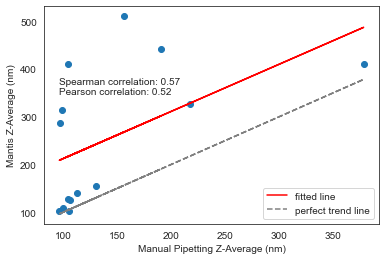

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress

# Read the Excel sheet into a pandas DataFrame
data = pd.read_excel('0614_MantisValidationSet_1.xlsx', sheet_name='Size')

# Extract Sample Name and Z-Average columns
extracted_data = data[['Sample Name', 'Z-Average']]

# Calculate the average Z-Average for rows with the same sample name
averaged_data = extracted_data.groupby('Sample Name').mean().reset_index()

# Define the datapoints and their corresponding Manual (-M) and Automated (-A) values
datapoints = averaged_data['Sample Name']
manual_values = averaged_data.loc[averaged_data['Sample Name'].str.endswith('- M'), 'Z-Average']
automated_values = averaged_data.loc[averaged_data['Sample Name'].str.endswith('- A'), 'Z-Average']

# Perform Pearson correlation
pearson_corr, _ = pearsonr(manual_values, automated_values)
print(f'Pearson correlation: {pearson_corr}')

# Perform Spearman correlation
spearman_corr, _ = spearmanr(manual_values, automated_values)
print(f'Spearman correlation: {spearman_corr}')

# Plot the scatter plot
plt.scatter(manual_values, automated_values)

# Calculate the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(manual_values, automated_values)

# Plot the regression line
plt.plot(manual_values, intercept + slope * manual_values, 'r', label='fitted line')

# Plot perfect trend line
plt.plot(manual_values, manual_values, 'g--', label='perfect trend line', color='gray')

# Adding the correlation values on the lower center left of the graph
plt.text(min(manual_values), min(automated_values) + 0.6*(max(automated_values)-min(automated_values)), f'Pearson correlation: {pearson_corr:.2f}')
plt.text(min(manual_values), min(automated_values) + 0.65*(max(automated_values)-min(automated_values)), f'Spearman correlation: {spearman_corr:.2f}')

plt.xlabel('Manual Pipetting Z-Average (nm)')
plt.ylabel('Mantis Z-Average (nm)')
plt.legend()

plt.savefig('SizePlot.png', dpi=300, bbox_inches='tight')
plt.show()
